In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("online_profit.csv")

In [3]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,NaN,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,NaN,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df['Marketing Spend'] = df['Marketing Spend'].fillna(method='ffill')

In [6]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               3
Profit             1
dtype: int64

In [7]:
df['Area'] = df['Area'].fillna(method='ffill')

In [8]:
df['Profit'] = df['Profit'].fillna(method='ffill')

In [9]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [10]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,114523.61,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Ctg,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# One Hot Encoding

In [11]:
dummy = pd.get_dummies(df['Area'],drop_first=True)

In [12]:
new_df = df.drop("Area",axis=1)

In [13]:
df = pd.concat([new_df,dummy],axis=1)

In [14]:
df.head()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,114523.61,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [15]:
df.shape

(50, 6)

In [16]:
x = df.drop('Profit',axis=1)

In [17]:
y = df.Profit

In [18]:
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,1,0
1,114523.61,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,1,0
4,142107.34,91391.77,366168.42,0,1


In [19]:
x.shape

(50, 5)

In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
y.shape

(50,)

# Visualization

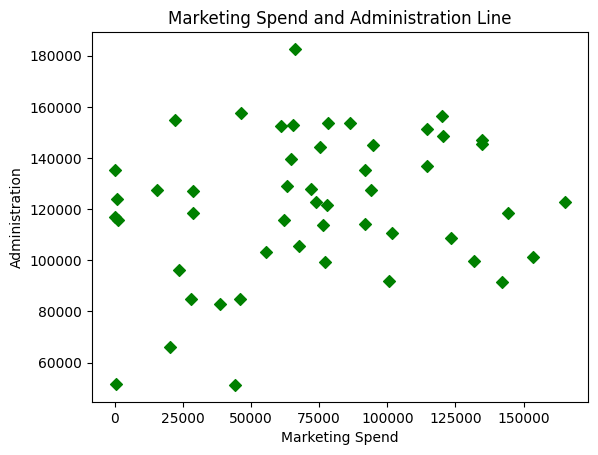

In [22]:
plt.title("Marketing Spend and Administration Line")
plt.xlabel("Marketing Spend")
plt.ylabel("Administration")
plt.scatter(df['Marketing Spend'],df['Administration'],marker="D",color="Green")

<AxesSubplot: xlabel='Marketing Spend', ylabel='Count'>

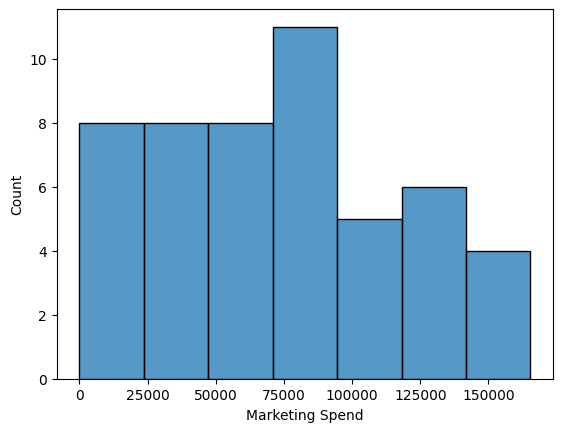

In [23]:
sns.histplot(df['Marketing Spend'])

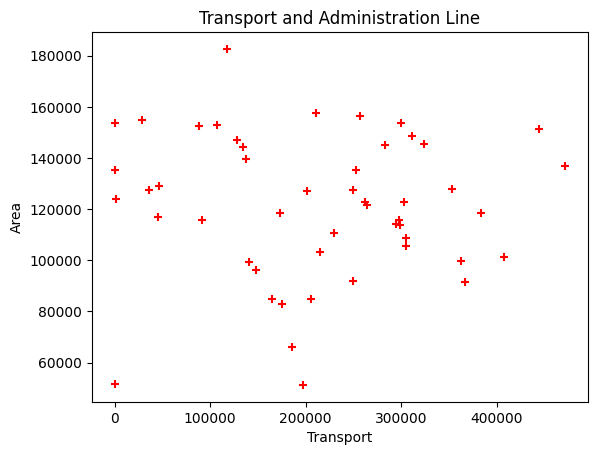

In [24]:
plt.title("Transport and Administration Line")
plt.xlabel("Transport")
plt.ylabel("Area")
plt.scatter(df['Transport'],df['Administration'],marker="+",color="Red")

<AxesSubplot: xlabel='Administration', ylabel='Count'>

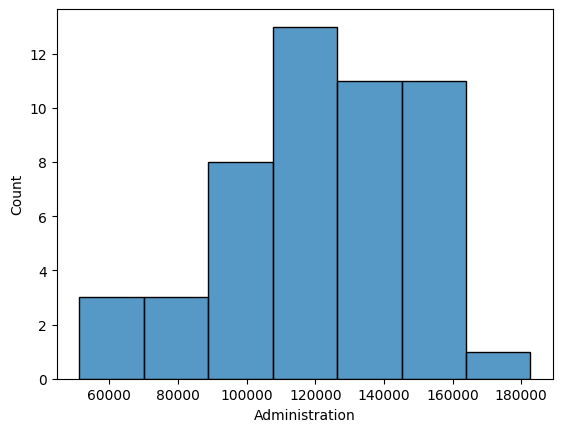

In [25]:
sns.histplot(df['Administration'])

<AxesSubplot: xlabel='Transport', ylabel='Count'>

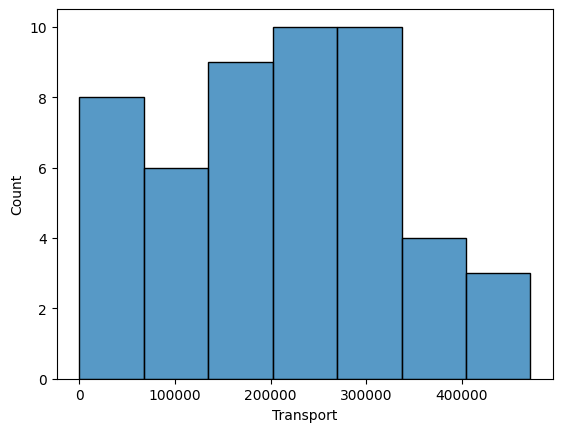

In [26]:
sns.histplot(df['Transport'])

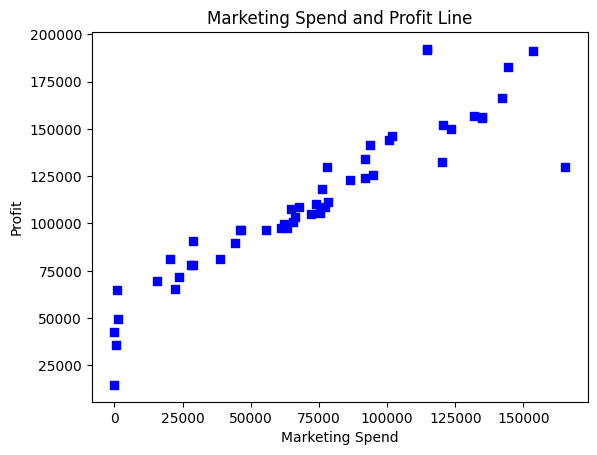

In [27]:
plt.title("Marketing Spend and Profit Line")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.scatter(df['Marketing Spend'],df['Profit'],marker="s",color="Blue")

<AxesSubplot: xlabel='Profit', ylabel='Count'>

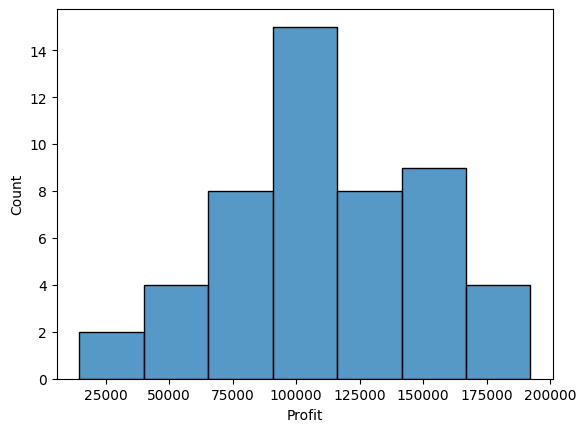

In [28]:
sns.histplot(df['Profit'])

# Spliting Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)

In [31]:
xtrain.shape

(40, 5)

In [32]:
xtest.shape

(10, 5)

In [33]:
ytrain.shape

(40,)

In [34]:
ytest.shape

(10,)

# Using Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [38]:
reg.score(xtest,ytest)

0.9118165302499692

In [39]:
reg.coef_

array([ 6.32670681e-01,  7.46055646e-02,  8.44478567e-02, -4.44505772e+03,
       -6.69098433e+03])

In [40]:
reg.intercept_

42658.96421851381

# For User Input

In [41]:
a = float(input("Enter Marketing Spend: "))
b = float(input("Enter Administration: "))
c = float(input("Enter Transport: "))
d = input("Enter District Name:")

if d.lower() == 'dhaka':
    v = float(reg.predict([[a, b, c, 1, 0]]))
    fv = "{:.2f}".format(v)
    print("Profit: ",fv)
elif d.lower() == 'rangpur':
    v = float(reg.predict([[a, b, c, 0, 1]]))
    fv = "{:.2f}".format(v)
    print("Profit: ",fv)
elif d.lower() == 'ctg':
    v = float(reg.predict([[a, b, c, 0, 0]]))
    fv = "{:.2f}".format(v)
    print("Profit: ",fv)

Enter Marketing Spend: 144372.41
Enter Administration: 118671.85
Enter Transport: 383199.62
Enter District Name:Dhaka
Profit:  170768.06
